In [167]:
#Fraud_Check

In [168]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 500
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, classification_report
%matplotlib inline

In [169]:
#Read The Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/Fraud_check.csv ')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [170]:
df2 = df.drop(columns=['Undergrad','Marital.Status','Urban'])
df2

,Taxable.Income,City.Population,Work.Experience
0,68833,50047,10
1,33700,134075,18
2,36925,160205,30
3,50190,193264,15
4,81002,27533,28
...,...,...,...
595,76340,39492,7
596,69967,55369,2
597,47334,154058,0
598,98592,180083,17


In [171]:
#Model Building
x = df2.iloc[:,:-1]
y = df2['City.Population']

In [172]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [173]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [174]:
ypred

array([ 64967.91,  34192.04,  64931.92,  65409.39,  58046.56,  50427.04,
       131445.96, 154564.33,  66362.83,  38330.2 , 118387.55,  39634.73,
        50156.39, 124759.2 , 149720.42, 162977.3 , 163220.66, 147467.24,
       108074.93,  59337.94,  86759.45,  75258.39,  98253.56,  96128.14,
       197074.4 , 100766.45, 153970.2 ,  35170.92, 192346.22,  92955.45,
       161322.41, 183329.15, 134893.23, 157145.92, 164580.53,  43887.11,
       194856.77, 158573.77, 116020.05,  27976.19, 140785.9 , 137776.37,
       137829.16,  68382.8 , 160522.08, 176213.11,  31324.83, 111099.81,
       102204.47,  80486.  , 129178.81, 177233.89,  91569.97,  26698.49,
        57421.12,  93272.52, 109090.16,  75279.4 , 147700.8 , 182957.26,
        59122.02,  55604.63, 100977.31,  63816.45,  98126.73,  75122.54,
        57209.38, 105672.23, 191636.99,  50159.2 , 107728.14, 112622.9 ,
       114648.92,  76415.13, 116509.31,  41777.3 , 147665.12, 125279.49,
        33027.68, 193905.37, 108191.47, 105544.36, 

In [175]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [176]:
print(f"R2value:{r2_score(ytest,ypred)}")
print(f"MSE:{mean_squared_error(ytest,ypred)}")
print(f"RMSE:{np.sqrt(mean_squared_error(ytest,ypred))}")

R2value:0.9999715241835951
MSE:71622.3729426663
RMSE:267.6235657461172


In [177]:
#Plotting Regressor

len(rf.estimators_)

100

In [178]:
rf.estimators_[99]

DecisionTreeRegressor(max_features=1.0, random_state=1786748030)

In [179]:
from sklearn import tree

[Text(0.5, 0.875, 'City.Population <= 108089.5\nsquared_error = 2435669280.882\nsamples = 281\nvalue = 105277.302'),
 Text(0.25, 0.625, 'City.Population <= 64532.5\nsquared_error = 520159196.602\nsamples = 150\nvalue = 66180.901'),
 Text(0.125, 0.375, 'City.Population <= 45627.5\nsquared_error = 144978017.144\nsamples = 68\nvalue = 44820.991'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'City.Population <= 85513.5\nsquared_error = 123902349.269\nsamples = 82\nvalue = 84279.756'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'City.Population <= 152577.5\nsquared_error = 816825688.835\nsamples = 131\nvalue = 150764.462'),
 Text(0.625, 0.375, 'City.Population <= 127609.5\nsquared_error = 135143766.119\nsamples = 70\nvalue = 126604.564'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'City.Population <= 177463.0\nsquared_error = 1914

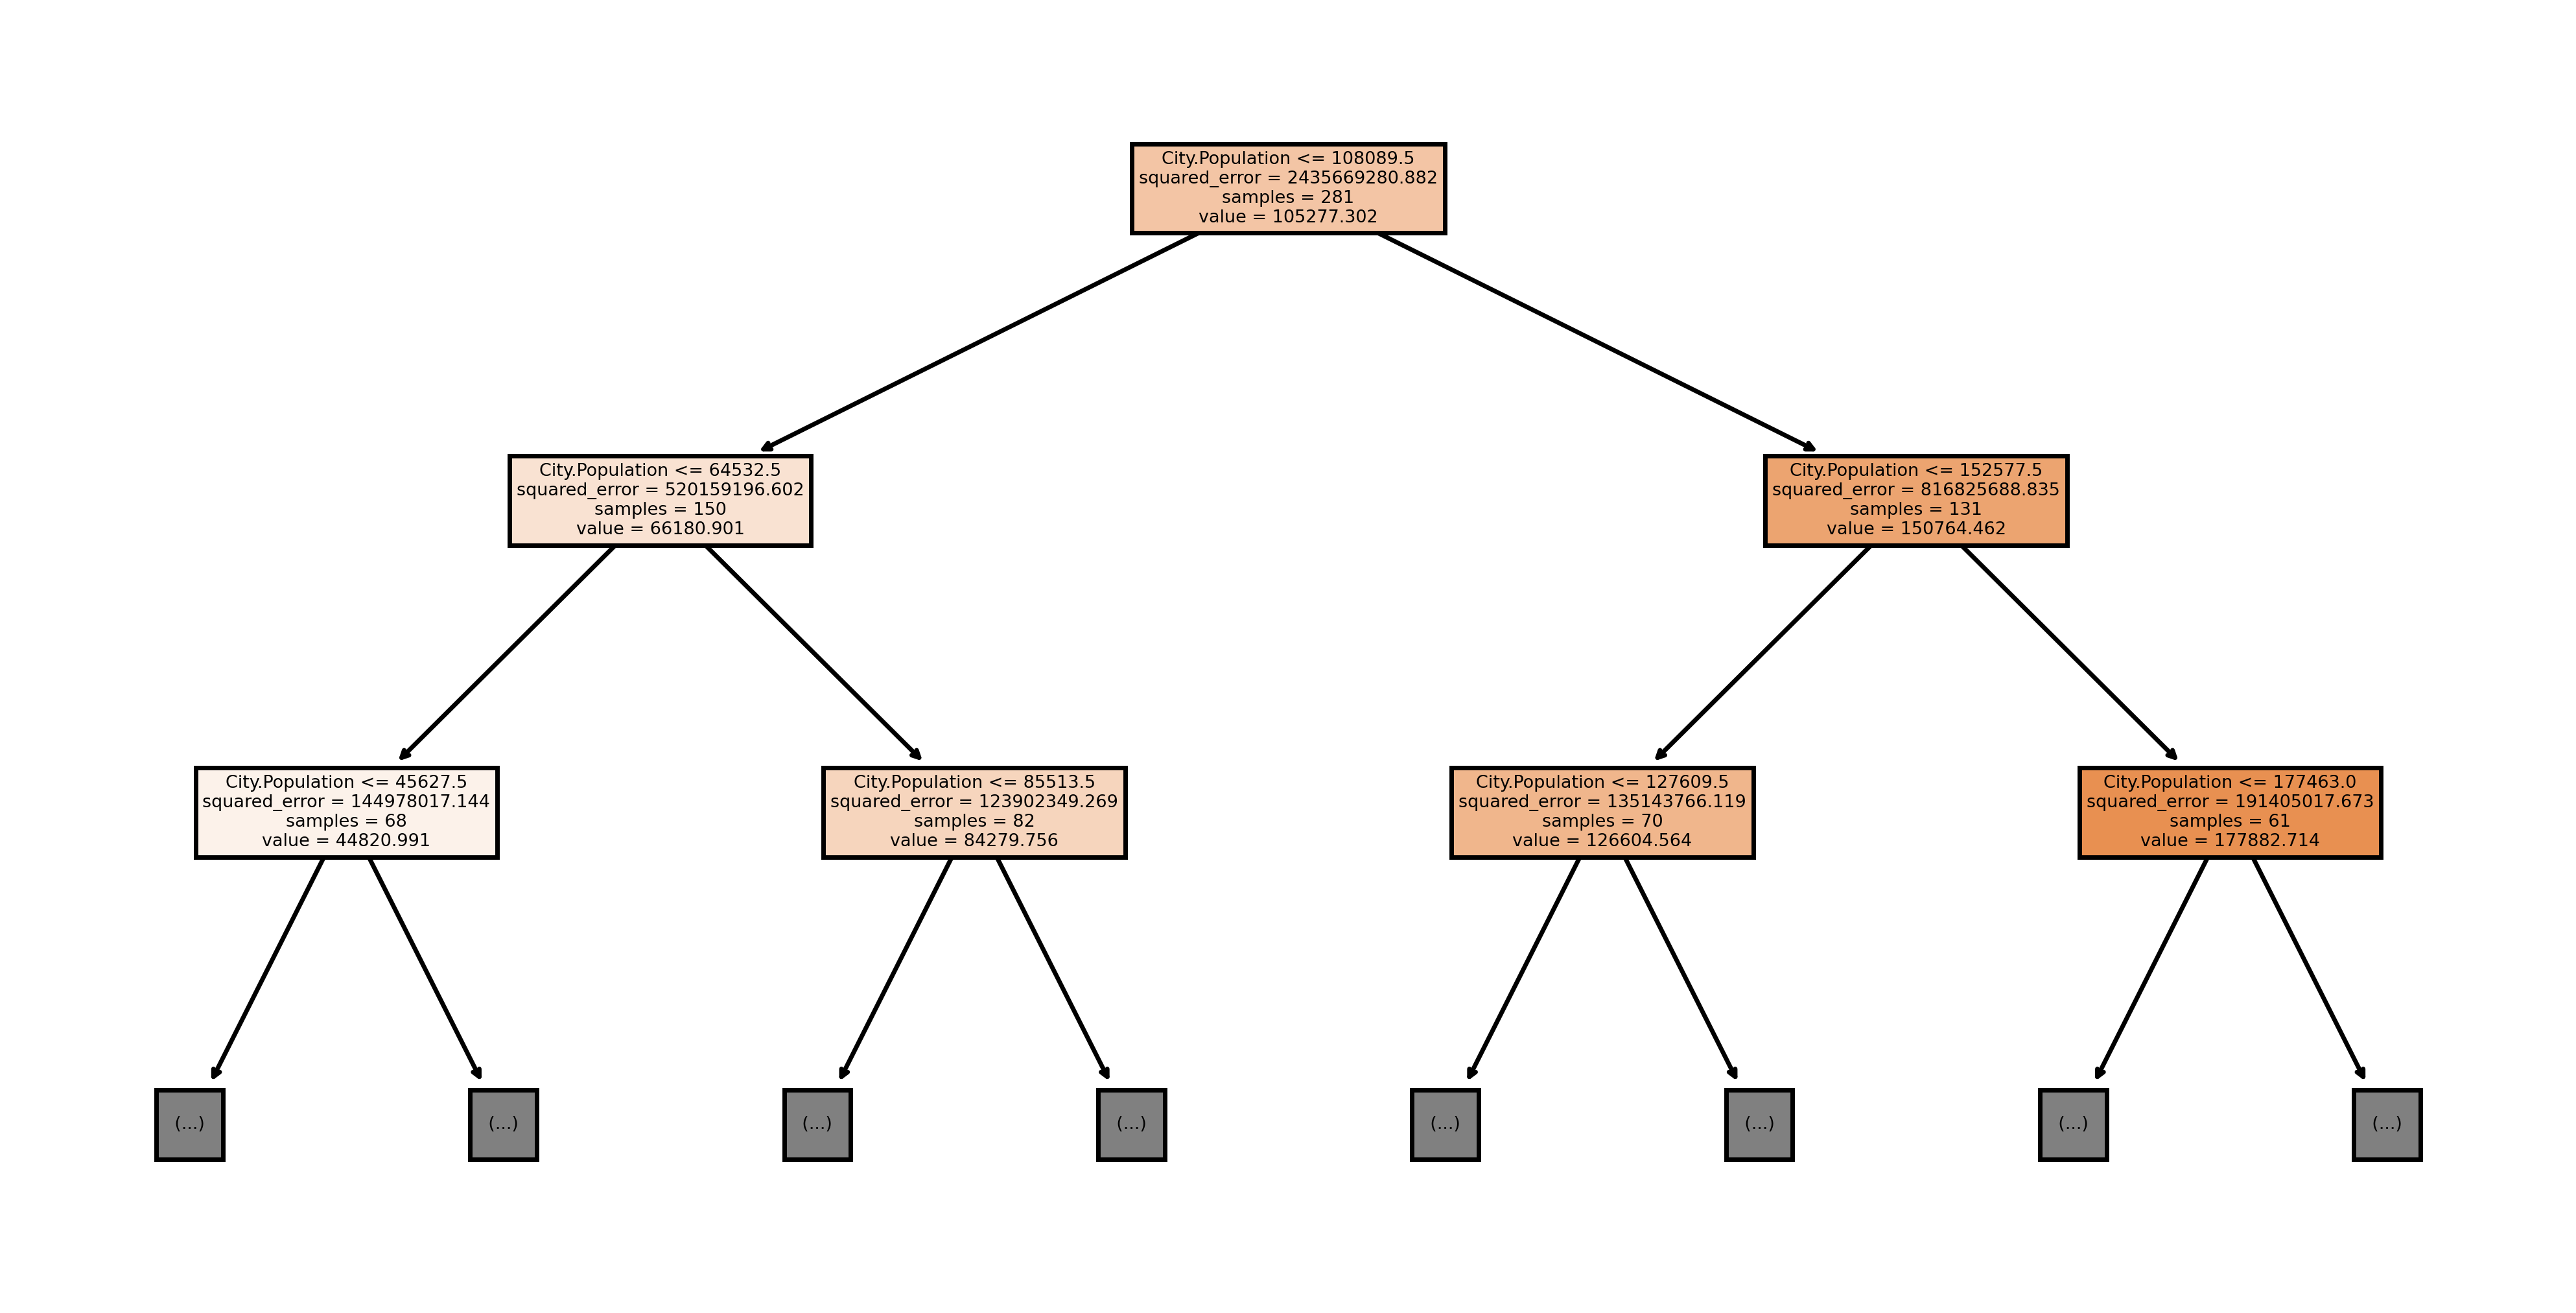

In [180]:
tree.plot_tree(rf.estimators_[1],feature_names=x.columns,filled=True,max_depth=2)

In [181]:
#Classification

In [182]:
#Read The Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/Fraud_check.csv ')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [183]:
df3 = df.drop(columns=['Undergrad','Marital.Status','Urban'])
df3

,Taxable.Income,City.Population,Work.Experience
0,68833,50047,10
1,33700,134075,18
2,36925,160205,30
3,50190,193264,15
4,81002,27533,28
...,...,...,...
595,76340,39492,7
596,69967,55369,2
597,47334,154058,0
598,98592,180083,17


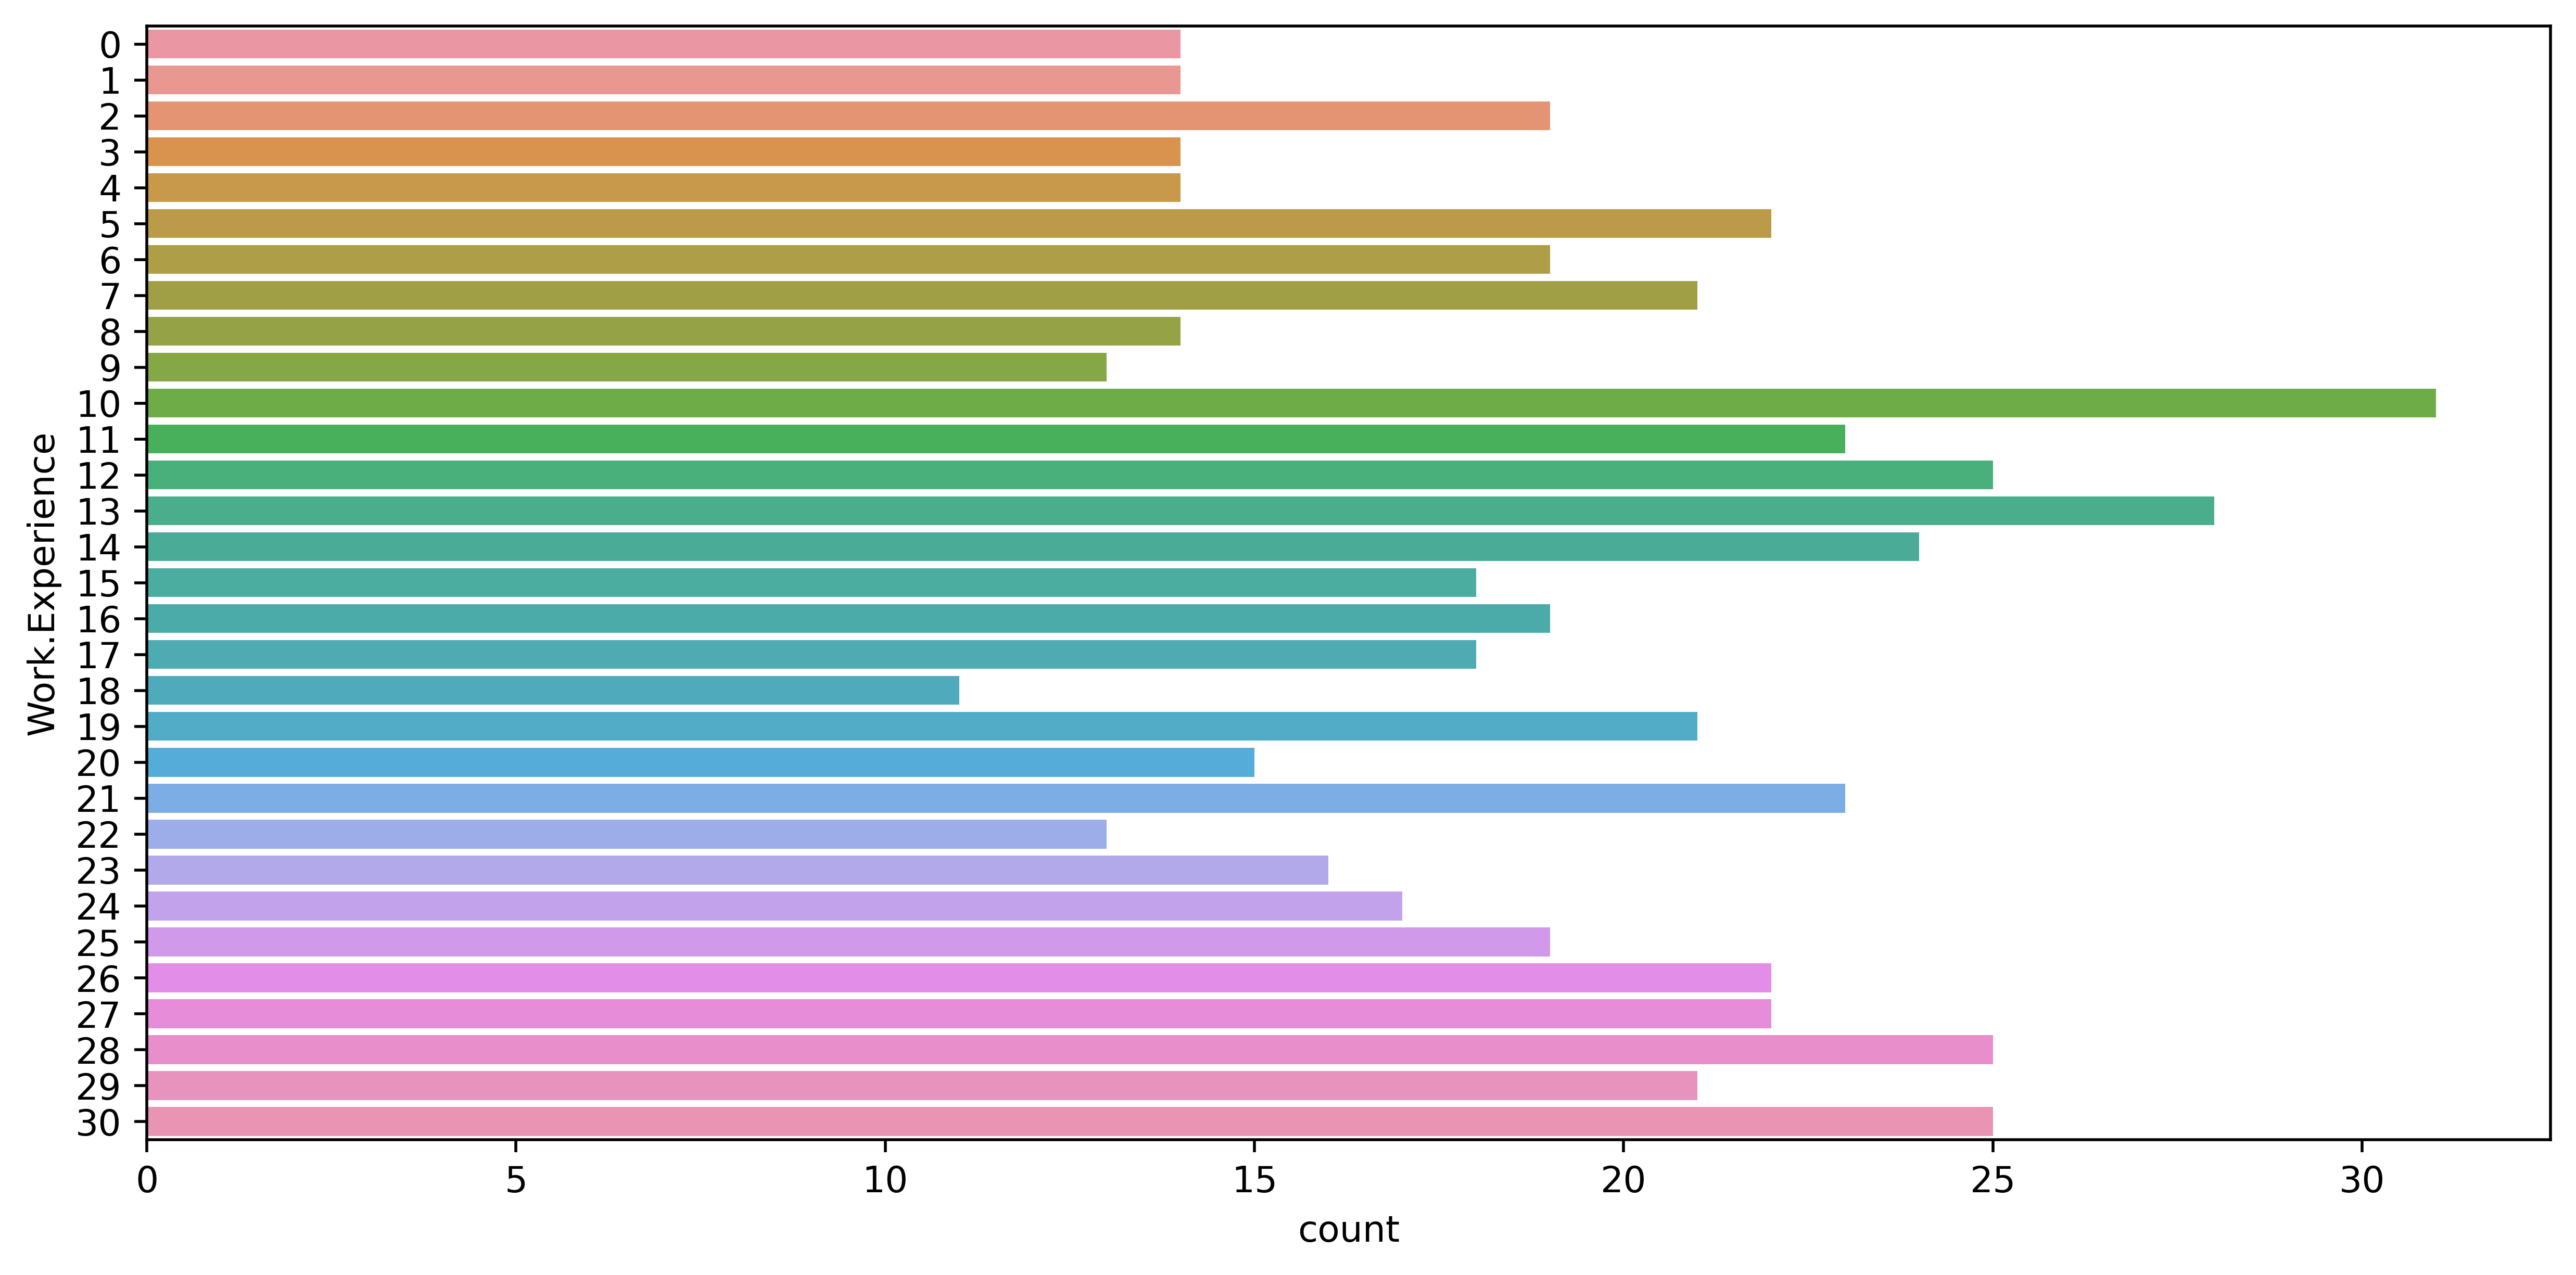

In [184]:
sns.countplot(y=df3['Work.Experience'])
plt.tight_layout()
plt.show()

In [185]:
df3['Taxable.Income'].value_counts()

59689    2
68833    1
60822    1
93090    1
79373    1
        ..
61906    1
31088    1
70365    1
56536    1
96519    1
Name: Taxable.Income, Length: 599, dtype: int64

In [186]:
df3['Taxable.Income'].replace([0,1,2,3],['Low','Medium','High','Very High'], inplace=True)

In [187]:
df3['Taxable.Income']

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [188]:
x = df3.iloc[:,:-1]
y = df3['Taxable.Income']

In [189]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=1)

In [190]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [191]:
ypred = rfc.predict(xtest)
ypred

array([17440, 92498, 13747, 78573, 31085, 94247, 38586, 78969, 42074,
       90065, 46798, 19649, 70339, 70572, 11794, 60915, 60915, 64007,
       48738, 68404, 59689, 71428, 95145, 81939, 93364, 17183, 87685,
       42063, 38896, 65170, 98738, 71297, 51927, 33215, 79700, 31629,
       56647, 57365, 59440, 94013, 32603, 12011, 68696, 42074, 48392,
       26741, 60789, 10348, 65170, 94413, 16316, 56501, 50087, 94013,
       31085, 83519, 36317, 13747, 91870, 81079, 68404, 58199, 76700,
       10150, 65170, 66865, 39052, 62141, 88918, 51914, 54126, 43980,
       83459, 16320, 28904, 92070, 64007, 25766, 92498, 70526, 12682,
       83519, 93078, 29916, 19060, 71297, 84263, 73795, 21945, 13747,
       84775, 25766, 49995, 86958, 48169, 18032, 98738, 78796, 91488,
       15853, 81867, 73906, 90444, 75170, 51914, 67083, 49995, 71376,
       50087, 54638, 99128, 34655, 91488, 83357, 97341, 32905, 86208,
       52891, 14422, 42488])

In [192]:
#Evaluate Model
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       10003       0.00      0.00      0.00       1.0
       10150       0.00      0.00      0.00       0.0
       10348       0.00      0.00      0.00       0.0
       10455       0.00      0.00      0.00       1.0
       11784       0.00      0.00      0.00       1.0
       11794       0.00      0.00      0.00       0.0
       11865       0.00      0.00      0.00       1.0
       12011       0.00      0.00      0.00       0.0
       12083       0.00      0.00      0.00       1.0
       12470       0.00      0.00      0.00       1.0
       12682       0.00      0.00      0.00       0.0
       13068       0.00      0.00      0.00       1.0
       13747       0.00      0.00      0.00       0.0
       14422       0.00      0.00      0.00       0.0
       14912       0.00      0.00      0.00       1.0
       15532       0.00      0.00      0.00       1.0
       15710       0.00      0.00      0.00       1.0
       15853       0.00    

In [193]:
rfc.score(xtrain,ytrain),rfc.score(xtest,ytest)

(1.0, 0.0)